# This script will generate all figures for the report


In [1]:
import sqlite3 # access the database
import pandas as pd # data processing
import matplotlib.pyplot as plt # generate graphs
#import igraph # graph fun
import numpy as np # math
import calmap # Make calendar map

In [2]:
conn = sqlite3.connect("STEM_Center.db")

In [30]:
df = pd.read_sql_query("SELECT Transaction_Date_Time FROM signins ORDER BY Transaction_Date_Time;", conn, parse_dates={"Transaction_Date_Time":"%Y-%m-%d"})
df.head()

,Transaction_Date_Time
0,2014-03-20 16:15:25
1,2014-03-20 16:15:37
2,2014-03-20 16:16:17
3,2014-03-20 16:16:52
4,2014-03-20 16:17:24


In [43]:
print("\nDifference between first 2 signins:")
df.iloc[1] - df.iloc[0] # should be 12 seconds after
print("\nLast signin:")
print(df.iloc[len(df) - 1]) # Get the last date in the database
print("\nData types:")
print(df.dtypes)
print("\nNumber of signins: " + str(len(df)))
print("\nColumns: ")
print(df.columns)
print("\nType:")
print(type(df))
print("\nIndex:")
print(df.index)


Difference between first 2 signins:

Last signin:
Transaction_Date_Time   2019-03-11 18:00:32
Name: 16771, dtype: datetime64[ns]

Data types:
Transaction_Date_Time    datetime64[ns]
dtype: object

Number of signins: 16772

Columns: 
Index(['Transaction_Date_Time'], dtype='object')

Type:
<class 'pandas.core.frame.DataFrame'>

Index:
RangeIndex(start=0, stop=16772, step=1)


In [50]:
datetime(df.iloc[0]).year

NameError: name 'datetime' is not defined

In [47]:
# Convert dataframe to a pandas series
#df.set_index("Transaction_Date_Time", inplace=True)
#ds = pd.Series(df["Transaction_Date_Time"])
ds = pd.to_datetime(df, format="%Y-%m-%d")
print(type(ds))
print(ds.index)

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [42]:
# Make the calendar heat map plot
calmap.calendarplot(df, monthticks=1, daylabels='MTWTFSS', cmap='YlGn', fillcolor='grey')

AttributeError: 'RangeIndex' object has no attribute 'year'

In [ ]:
calmap.yearplot(df, year=2015)

In [ ]:
type(df.iloc[0])

In [16]:









# Testing calmap library
all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)


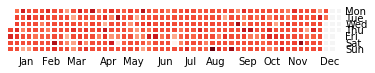

In [17]:
calmap.yearplot(events, year=2015)

/home/david/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd252917b00>,
       dtype=object))

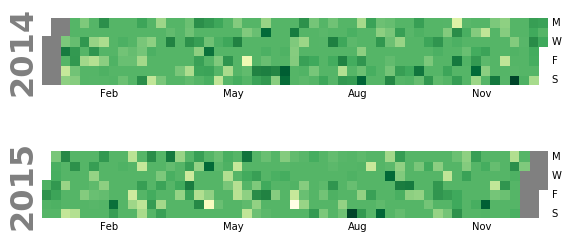

In [18]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))

In [19]:
print(type(events))
print(events.index)

<class 'pandas.core.series.Series'>
DatetimeIndex(['2014-02-06', '2015-06-07', '2015-06-04', '2015-12-07',
               '2015-09-10', '2014-09-23', '2015-11-01', '2015-02-02',
               '2014-01-31', '2014-10-25',
               ...
               '2015-08-28', '2014-07-18', '2014-01-29', '2015-09-07',
               '2015-07-30', '2015-10-15', '2015-10-30', '2014-09-12',
               '2015-12-15', '2014-10-15'],
              dtype='datetime64[ns]', length=500, freq=None)


In [20]:
events.columns

AttributeError: 'Series' object has no attribute 'columns'